In [3]:
import pandas as pd
import numpy as np

In [4]:
case_1 = pd.read_csv('case_one.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'case_one.csv'

In [ ]:
case_1

,0,1
0,2022-11-03 20:06:09.941346,133.0
1,2022-11-03 20:06:09.967728,133.0
2,2022-11-03 20:06:09.992725,133.0
3,2022-11-03 20:06:10.020726,133.0
4,2022-11-03 20:06:10.044725,133.0
...,...,...
1810,2022-11-03 20:16:09.502272,134.0
1811,2022-11-03 20:16:09.592888,134.0
1812,2022-11-03 20:16:09.623938,134.0
1813,2022-11-03 20:16:09.719412,134.0


In [ ]:
import matplotlib.pyplot as plt

## 센서 데이터로 분포 확인해서 감지한 부분 찾기

In [ ]:
# 센서에서 나온 데이터를 집합에 넣고 정렬하기
temp = pd.Series(list(set(case_1['1'])))

In [ ]:
# temp로 IQR 사용하기
q1 = temp.quantile(.25)
q2 = temp.quantile(.50)
q3 = temp.quantile(.75)
IQR = q3 - q1

min_outlier = q1 - 1.5 * IQR

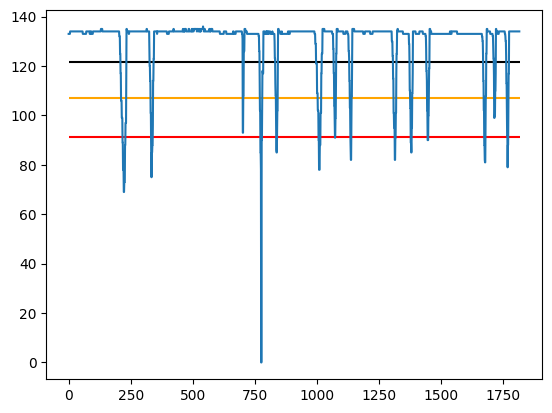

In [ ]:
# 센서가 반응한 지점을 찾기 위해 4분위수 확인해봄
plt.hlines(q1,0,len(case_1), colors='red')
plt.hlines(q2,0,len(case_1), colors='orange')
plt.hlines(q3,0,len(case_1), colors='black')
plt.plot(case_1['1'])
plt.show()

## 미분값 구하기

In [ ]:
# 미분값 구하기
diff = []
for i in range(len(case_1)):
    if i == 0:
        diff.append(0)
    else:
        diff.append(case_1['1'][i-1] - case_1['1'][i])

In [ ]:
case_1['diff'] = diff

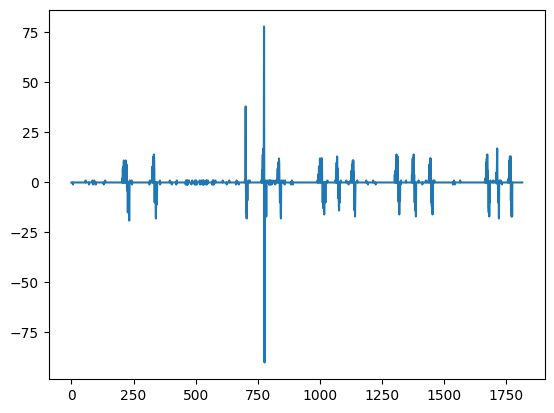

In [ ]:
plt.plot(case_1['diff'])

In [ ]:
# 함수로 만들기
def diff_search(df_name):
    diff = []
    for i in range(len(df_name)):
        if i == 0:
            diff.append(0)
        else:
            diff.append(df_name['1'][i-1] - df_name['1'][i])
    return diff

def diff_graph(diff):
    plt.plot(diff)
    plt.show()

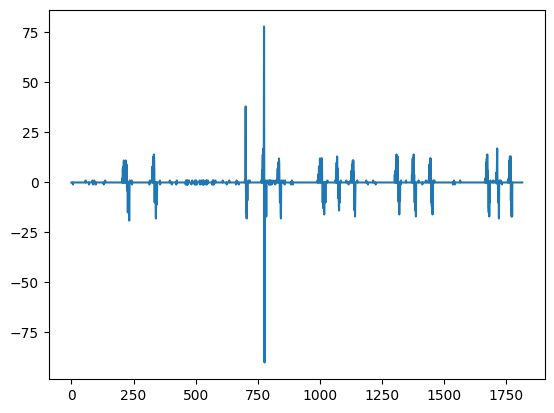

In [ ]:
diff_graph(diff_search(case_1))

In [ ]:
# 파일 불러오기 함수

def get_file(file_name):
    file_name = pd.read_csv(f'{file_name}.csv', index_col=0)

In [2]:
# 파일 다 불러오기
for i in range(1,8):
    file_name = f'case_{i}'
    get_file(file_name)

NameError: name 'get_file' is not defined